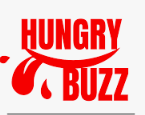

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Import Libraries & Load Data </span></b>

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

<b><span style='color:#fa762f'> </span><span style='color:#b58a12'> The dataset has two dataframes- menu items and order details. we review and merge the dataframes for further review </span></b>

In [2]:
df_1 = pd.read_csv('menu_items.csv')

In [3]:
df_1.head(5)

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [4]:
df_1.dtypes

menu_item_id      int64
item_name        object
category         object
price           float64
dtype: object

In [5]:
df_2 = pd.read_csv('order_details.csv')

In [6]:
df_2.head(5)

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0


In [7]:
df_2.dtypes

order_details_id      int64
order_id              int64
order_date           object
order_time           object
item_id             float64
dtype: object

In [8]:
df_2['order_date']=pd.to_datetime(df_2['order_date'])

In [9]:
df_2.dtypes

order_details_id             int64
order_id                     int64
order_date          datetime64[ns]
order_time                  object
item_id                    float64
dtype: object

In [10]:
df_2.head(5)

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,2023-01-01,11:38:36 AM,109.0
1,2,2,2023-01-01,11:57:40 AM,108.0
2,3,2,2023-01-01,11:57:40 AM,124.0
3,4,2,2023-01-01,11:57:40 AM,117.0
4,5,2,2023-01-01,11:57:40 AM,129.0


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'>  item_id from order_details and menu_item_id from menu_items are identical and we merge dataset on this column </span></b>

In [11]:
df = pd.merge(df_2, df_1, left_on='item_id', right_on='menu_item_id')

In [12]:
df.head()

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36 AM,109.0,109,Korean Beef Bowl,Asian,17.95
1,94,38,2023-01-01,5:03:00 PM,109.0,109,Korean Beef Bowl,Asian,17.95
2,110,45,2023-01-01,5:55:48 PM,109.0,109,Korean Beef Bowl,Asian,17.95
3,125,52,2023-01-01,6:53:02 PM,109.0,109,Korean Beef Bowl,Asian,17.95
4,175,76,2023-01-02,12:21:17 PM,109.0,109,Korean Beef Bowl,Asian,17.95


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12097 entries, 0 to 12096
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  datetime64[ns]
 3   order_time        12097 non-null  object        
 4   item_id           12097 non-null  float64       
 5   menu_item_id      12097 non-null  int64         
 6   item_name         12097 non-null  object        
 7   category          12097 non-null  object        
 8   price             12097 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 945.1+ KB


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'> drop menu_item_id as its a duplicate column after merge activities </span></b>

In [14]:
df=df.drop(columns='menu_item_id')

In [15]:
df.sort_values(by='order_id', inplace=True)

In [16]:
df

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1972,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50
1517,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95
588,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50
2331,6,2,2023-01-01,11:57:40 AM,106.0,French Fries,American,7.00
...,...,...,...,...,...,...,...,...
11392,12232,5369,2023-03-31,10:05:04 PM,120.0,Steak Torta,Mexican,13.95
2330,12231,5369,2023-03-31,10:05:04 PM,129.0,Mushroom Ravioli,Italian,15.50
5413,12233,5369,2023-03-31,10:05:04 PM,122.0,Chips & Salsa,Mexican,7.00
587,12230,5369,2023-03-31,10:05:04 PM,109.0,Korean Beef Bowl,Asian,17.95


In [17]:
table= pd.DataFrame({'unique':df.nunique(),
                   'Null':df.isnull().sum(),
                   'Nullpercent':df.isnull().sum()/len(df)*100,
                   'type':df.dtypes})

In [18]:
table

,unique,Null,Nullpercent,type
order_details_id,12097,0,0.0,int64
order_id,5343,0,0.0,int64
order_date,90,0,0.0,datetime64[ns]
order_time,4985,0,0.0,object
item_id,32,0,0.0,float64
item_name,32,0,0.0,object
category,4,0,0.0,object
price,14,0,0.0,float64


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'>various unique dishes in each category, we use groupby function</span></b>

In [19]:
df_3 = df.groupby(by='category')['item_name'].nunique().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [20]:
df_3

,category,counts
2,Italian,9
3,Mexican,9
1,Asian,8
0,American,6


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'> groupby, nunique, reset index and sort values used to find out counts of each category</span></b>

 <b><span style='color:#fa762f'> </span><span style='color:#b58a12'>most expensive and least expensive item calculation</span></b>

In [21]:
df['price'].max()

19.95

In [22]:
df[df['price']==19.95] #list of most expensive items is below

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
5415,22,9,2023-01-01,12:52:01 PM,130.0,Shrimp Scampi,Italian,19.95
5416,108,44,2023-01-01,5:54:20 PM,130.0,Shrimp Scampi,Italian,19.95
5417,169,74,2023-01-02,12:01:12 PM,130.0,Shrimp Scampi,Italian,19.95
5418,269,111,2023-01-02,6:38:01 PM,130.0,Shrimp Scampi,Italian,19.95
5419,379,157,2023-01-03,3:43:03 PM,130.0,Shrimp Scampi,Italian,19.95
...,...,...,...,...,...,...,...,...
5649,12083,5313,2023-03-31,12:24:23 PM,130.0,Shrimp Scampi,Italian,19.95
5650,12104,5317,2023-03-31,1:04:13 PM,130.0,Shrimp Scampi,Italian,19.95
5651,12171,5345,2023-03-31,5:30:29 PM,130.0,Shrimp Scampi,Italian,19.95
5652,12182,5350,2023-03-31,5:54:10 PM,130.0,Shrimp Scampi,Italian,19.95


In [23]:
df['price'].min()

5.0

In [44]:
df[df['price']==5.0] #list of least expensive items is below

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
7120,29,11,2023-01-01,1:02:59 PM,113.0,Edamame,Asian,5.0
7121,65,24,2023-01-01,2:23:01 PM,113.0,Edamame,Asian,5.0
7122,78,31,2023-01-01,3:50:18 PM,113.0,Edamame,Asian,5.0
7123,88,35,2023-01-01,4:32:04 PM,113.0,Edamame,Asian,5.0
7124,139,58,2023-01-01,7:30:40 PM,113.0,Edamame,Asian,5.0
...,...,...,...,...,...,...,...,...
7735,12190,5353,2023-03-31,6:40:10 PM,113.0,Edamame,Asian,5.0
7736,12197,5357,2023-03-31,6:55:22 PM,113.0,Edamame,Asian,5.0
7737,12203,5359,2023-03-31,7:13:16 PM,113.0,Edamame,Asian,5.0
7738,12207,5361,2023-03-31,7:40:42 PM,113.0,Edamame,Asian,5.0


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'>  How many italian dishes are on the menu? what is the most and least expensive amongst them?</span></b>

In [25]:
df.head(2)

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1972,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50


In [26]:
df_Italian=df[df['category']=='Italian']

In [27]:
df_Italian

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
1972,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50
1150,3,2,2023-01-01,11:57:40 AM,124.0,Spaghetti,Italian,14.50
5415,22,9,2023-01-01,12:52:01 PM,130.0,Shrimp Scampi,Italian,19.95
5654,23,9,2023-01-01,12:52:01 PM,132.0,Eggplant Parmesan,Italian,16.95
1973,20,9,2023-01-01,12:52:01 PM,129.0,Mushroom Ravioli,Italian,15.50
...,...,...,...,...,...,...,...,...
10184,12200,5358,2023-03-31,7:07:27 PM,128.0,Cheese Lasagna,Italian,15.50
5653,12220,5365,2023-03-31,8:31:48 PM,130.0,Shrimp Scampi,Italian,19.95
2329,12219,5365,2023-03-31,8:31:48 PM,129.0,Mushroom Ravioli,Italian,15.50
10185,12227,5368,2023-03-31,9:58:47 PM,128.0,Cheese Lasagna,Italian,15.50


In [28]:
df_Italian['price'].max()

19.95

In [29]:
df_Italian[df_Italian['price']==19.95]

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
5415,22,9,2023-01-01,12:52:01 PM,130.0,Shrimp Scampi,Italian,19.95
5416,108,44,2023-01-01,5:54:20 PM,130.0,Shrimp Scampi,Italian,19.95
5417,169,74,2023-01-02,12:01:12 PM,130.0,Shrimp Scampi,Italian,19.95
5418,269,111,2023-01-02,6:38:01 PM,130.0,Shrimp Scampi,Italian,19.95
5419,379,157,2023-01-03,3:43:03 PM,130.0,Shrimp Scampi,Italian,19.95
...,...,...,...,...,...,...,...,...
5649,12083,5313,2023-03-31,12:24:23 PM,130.0,Shrimp Scampi,Italian,19.95
5650,12104,5317,2023-03-31,1:04:13 PM,130.0,Shrimp Scampi,Italian,19.95
5651,12171,5345,2023-03-31,5:30:29 PM,130.0,Shrimp Scampi,Italian,19.95
5652,12182,5350,2023-03-31,5:54:10 PM,130.0,Shrimp Scampi,Italian,19.95


In [30]:
df_Italian['price'].min()

14.5

In [31]:
df_Italian[df_Italian['price']==14.5]

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
1150,3,2,2023-01-01,11:57:40 AM,124.0,Spaghetti,Italian,14.5
4345,16,9,2023-01-01,12:52:01 PM,126.0,Fettuccine Alfredo,Italian,14.5
1151,37,15,2023-01-01,1:33:00 PM,124.0,Spaghetti,Italian,14.5
1152,45,17,2023-01-01,1:53:00 PM,124.0,Spaghetti,Italian,14.5
1153,57,20,2023-01-01,2:03:08 PM,124.0,Spaghetti,Italian,14.5
...,...,...,...,...,...,...,...,...
4589,12143,5332,2023-03-31,2:51:37 PM,126.0,Fettuccine Alfredo,Italian,14.5
4590,12153,5336,2023-03-31,3:32:39 PM,126.0,Fettuccine Alfredo,Italian,14.5
4591,12159,5339,2023-03-31,4:12:55 PM,126.0,Fettuccine Alfredo,Italian,14.5
4592,12184,5351,2023-03-31,6:04:00 PM,126.0,Fettuccine Alfredo,Italian,14.5


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'>what is the average dish price within each category </span></b>

In [32]:
df_4 = df.groupby(by='category')['price'].mean().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [33]:
df_4

,category,counts
2,Italian,16.778392
1,Asian,13.464164
3,Mexican,11.815552
0,American,10.328365


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'> which orders had the most number of items</span></b>

In [34]:
df

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1972,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50
1517,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95
588,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50
2331,6,2,2023-01-01,11:57:40 AM,106.0,French Fries,American,7.00
...,...,...,...,...,...,...,...,...
11392,12232,5369,2023-03-31,10:05:04 PM,120.0,Steak Torta,Mexican,13.95
2330,12231,5369,2023-03-31,10:05:04 PM,129.0,Mushroom Ravioli,Italian,15.50
5413,12233,5369,2023-03-31,10:05:04 PM,122.0,Chips & Salsa,Mexican,7.00
587,12230,5369,2023-03-31,10:05:04 PM,109.0,Korean Beef Bowl,Asian,17.95


In [35]:
df_5 = df.groupby(by='order_id')['order_id'].count().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [36]:
df_5

,order_id,counts
3453,3473,14
438,443,14
2658,2675,14
4282,4305,14
1946,1957,14
...,...,...
2555,2570,1
2557,2572,1
2560,2575,1
2567,2582,1


how many orders have more than 12 items?

In [37]:
df_5[df_5['counts']>=12]

,order_id,counts
3453,3473,14
438,443,14
2658,2675,14
4282,4305,14
1946,1957,14
325,330,14
435,440,14
5038,5066,13
1723,1734,13
3562,3583,13


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'> what were the least and most ordered items? what categories they are in </span></b>

In [38]:
df.head(5)

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1972,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50
1517,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95
588,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50
2331,6,2,2023-01-01,11:57:40 AM,106.0,French Fries,American,7.00


In [39]:
df['item_name'].value_counts()

Hamburger                622
Edamame                  620
Korean Beef Bowl         588
Cheeseburger             583
French Fries             571
Tofu Pad Thai            562
Steak Torta              489
Spaghetti & Meatballs    470
Mac & Cheese             463
Chips & Salsa            461
Orange Chicken           456
Chicken Burrito          455
Eggplant Parmesan        420
Chicken Torta            379
Spaghetti                367
Chicken Parmesan         364
Pork Ramen               360
Mushroom Ravioli         359
California Roll          355
Steak Burrito            354
Salmon Roll              324
Meat Lasagna             273
Hot Dog                  257
Fettuccine Alfredo       249
Shrimp Scampi            239
Veggie Burger            238
Chips & Guacamole        237
Cheese Quesadillas       233
Steak Tacos              214
Cheese Lasagna           207
Potstickers              205
Chicken Tacos            123
Name: item_name, dtype: int64

 <b><span style='color:#fa762f'> </span><span style='color:#b58a12'>  View the details of the highest spent order. what insights can you gather from the details?span></b>

In [40]:
df

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1972,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50
1517,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95
588,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50
2331,6,2,2023-01-01,11:57:40 AM,106.0,French Fries,American,7.00
...,...,...,...,...,...,...,...,...
11392,12232,5369,2023-03-31,10:05:04 PM,120.0,Steak Torta,Mexican,13.95
2330,12231,5369,2023-03-31,10:05:04 PM,129.0,Mushroom Ravioli,Italian,15.50
5413,12233,5369,2023-03-31,10:05:04 PM,122.0,Chips & Salsa,Mexican,7.00
587,12230,5369,2023-03-31,10:05:04 PM,109.0,Korean Beef Bowl,Asian,17.95


In [41]:
df_6 = df.groupby(by='order_id')['price'].sum().reset_index(name='price_P').sort_values(by='price_P', ascending=False)

In [42]:
df_6

,order_id,price_P
435,440,192.15
2064,2075,191.05
1946,1957,190.10
325,330,189.70
2658,2675,185.10
...,...,...
2466,2480,5.00
4858,4885,5.00
2469,2483,5.00
3510,3531,5.00


In [43]:
df[df['order_id']==440]

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
10568,1014,440,2023-01-08,12:16:34 PM,131.0,Chicken Parmesan,Italian,17.95
9725,1011,440,2023-01-08,12:16:34 PM,127.0,Meat Lasagna,Italian,17.95
49,1010,440,2023-01-08,12:16:34 PM,109.0,Korean Beef Bowl,Asian,17.95
4367,1009,440,2023-01-08,12:16:34 PM,126.0,Fettuccine Alfredo,Italian,14.50
2386,1015,440,2023-01-08,12:16:34 PM,106.0,French Fries,American,7.00
11422,1004,440,2023-01-08,12:16:34 PM,103.0,Hot Dog,American,9.00
1186,1005,440,2023-01-08,12:16:34 PM,124.0,Spaghetti,Italian,14.50
5686,1016,440,2023-01-08,12:16:34 PM,132.0,Eggplant Parmesan,Italian,16.95
8702,1007,440,2023-01-08,12:16:34 PM,125.0,Spaghetti & Meatballs,Italian,17.95
8701,1006,440,2023-01-08,12:16:34 PM,125.0,Spaghetti & Meatballs,Italian,17.95


 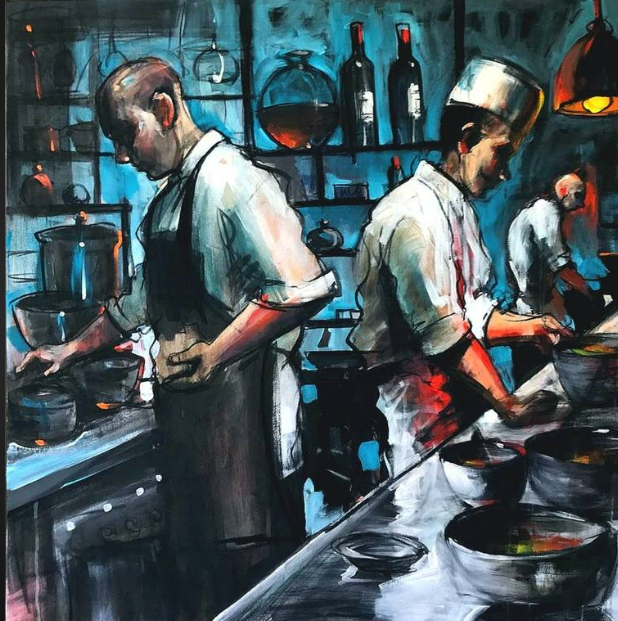


<b><span style='color:#fa762f'> </span><span style='color:#b58a12'> we turn ordinary meals into extraordinary memories! 
👍 